<a href="https://colab.research.google.com/github/JoyceKurita/term_deposit/blob/main/Parte_I_EDA_Term_Deposit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Parte I - Análise e visualização dos dados**

Conhecer seus clientes é fundamental para direcionar campanhas de marketing mais eficazes. E é através dos dados que podemos conhecê-los melhor. Assim, sabemos qual o perfil do cliente mais propenso a adquirir certo tipo de produto.

Como dito anteriormente, para esse projeto de Data Science seguiremos as seguintes etapas:

1. **Obtenção dos dados**
2. **Análise Exploratória e Visualização dos dados**
3. Pré-processamento
4. Modelos de Machine Learning
5. Avaliação do modelo

Nesta seção, exploraremos as etapas **1** e **2** descritas acima, e iremos entender melhor a natureza dos dados coletados, analizando o perfil dos clientes que abrem um *term deposit*.

Utilizaremos o Google Colab, editor de python em nuvem, para realizar as análises.


**Importando as bibliotecas**

A primeiro passo é importar as bibliotecas que serão utilizadas nesta fase do projeto: 


*   Pandas - Análise e manipulação de dados;
*   Numpy - Aplica funções matemáticas em arrays e matrizes multidimensionais;
*   Matplotlib e Seaborn - Visualização de dados.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Importando e lendo os arquivos**

O conjunto de dados está armazenado em um repositório do GitHub, iremos importá-lo ao Google Colab e realizar a verificação inicial.

In [ ]:
# leitura do conjunto de dados
treino = pd.read_csv('https://raw.githubusercontent.com/JoyceKurita/term_deposit/main/files/treino.csv')

Visualizando as cinco primeiras linhas do conjunto de dados:

In [ ]:
treino.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,term_deposit
0,0,46,management,divorced,tertiary,no,14481,yes,no,unknown,30,may,1,-1,0,unknown,yes
1,1,37,management,single,tertiary,no,457,yes,no,cellular,1,apr,3,-1,0,unknown,no
2,2,34,blue-collar,single,secondary,no,1698,yes,no,unknown,27,may,7,-1,0,unknown,no
3,3,45,unemployed,single,secondary,no,33,no,no,cellular,5,feb,1,-1,0,unknown,no
4,4,31,management,married,tertiary,no,131,no,no,cellular,18,feb,2,-1,0,unknown,yes


## **Análise exploratória de dados**

Nessa etapa, iremos:

*   Identificar o tipo de cada variável (numérica, categórica);
*   Explorar os dados;
*   Visualizar os dados para identificar o perfil dos clientes.


Com o comando *info*, podemos visualizar algumas informações iniciais:

In [ ]:
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    6500 non-null   int64 
 1   age           6500 non-null   int64 
 2   job           6500 non-null   object
 3   marital       6500 non-null   object
 4   education     6500 non-null   object
 5   default       6500 non-null   object
 6   balance       6500 non-null   int64 
 7   housing       6500 non-null   object
 8   loan          6500 non-null   object
 9   contact       6500 non-null   object
 10  day           6500 non-null   int64 
 11  month         6500 non-null   object
 12  campaign      6500 non-null   int64 
 13  pdays         6500 non-null   int64 
 14  previous      6500 non-null   int64 
 15  poutcome      6500 non-null   object
 16  term_deposit  6500 non-null   object
dtypes: int64(7), object(10)
memory usage: 863.4+ KB


Podemos observar o tamanho do conjunto de dados, que possui 16 colunas - que são as variáveis - e 6500 linhas de dados. As variáveis são de dois tipos, *int64* (número inteiro) e *object* (*string*/texto). Observa-se também que não há valores em branco (nas colunas, todas as 6500 linhas são *non-null*).

No conjunto de dados acima, temos as seguintes variáveis:


*   **Unnamed: 0:** índice (numérica);
*   **age:** idade (numérica);
*   **job:** tipo de emprego (categórica: ‘admin.’, ‘blue collar’, ‘entrepreneur’, ‘housemaid’, ‘management’, ‘retired’, ‘self-employed’, ‘services’, ‘student’, ‘technician’, ‘unemployed’);
*   **marital:** estado civil (categórica: ‘divorced’,‘married’,‘single’);
*   **education:** grau de instrução (categórica:‘primary’,‘secondary’,‘tertiary’);
*   **default:** é adimplente? (categórica: ‘no’,‘yes’);
*   **housing:** tem casa própria? (categórica: ‘no’,‘yes’);
*   **loan:** tem empréstimo? (categórica: ‘no’,‘yes’);
*   **balance:** saldo em conta (numérica);
*   **contact:** tipo de comunicação (categórica: ‘cellular’,‘telephone’);
*   **month:** mês do último contato (categórica: ‘jan’, ‘feb’, ‘mar’, ., ‘nov’, ‘dec’);
*   **day:** dia do último contato (numérica);
*   **campaign:** número de contatos da última campanha (numérica);
*   **pdays:** número de dias do último contato em campanha anterior (numérica);
*   **previous:** número de contatos anteriores (numérica);
*   **poutcome:** resultado da campanha anterior (categórica: ‘failure’,‘other’,‘success’);
*   **term_deposit** o cliente abriu um *term deposit*? (categórica: ‘yes’,‘no’) - **Variável Resposta**

In [ ]:
cores = ['#4faed6', '#f01f34']

### **Analizando variável resposta**

In [ ]:
vr = pd.DataFrame(treino.groupby('term_deposit').term_deposit.count())
vr['term_deposit'] = (vr['term_deposit'] * 100) / treino.shape[0]
vr['term_deposit'] = round(vr['term_deposit'], 2)
vr.columns = ['Porcentagem']
vr.index.name = None
vr

,Porcentagem
no,50.26
yes,49.74


Observamos que a porcentagem de resultados positivos e negativos são muito próximos.

### **Analizando as variáveis numéricas**

Executando o comando *describe*, podemos verificar algumas medidas descritivas relacionadas às variáveis numéricas, como média, mediana (quartil 50%) quartis, máximo, mínimo, desvio padrão e contagem.

In [ ]:
treino.describe()

,Unnamed: 0,age,balance,day,campaign,pdays,previous
count,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000
mean,3249.500000,40.899692,1551.448462,15.660923,2.587846,38.655231,0.551846
std,1876.532707,11.309033,3235.418262,8.361566,2.790440,93.642546,1.825413
min,0.000000,18.000000,-3372.000000,1.000000,1.000000,-1.000000,0.000000
25%,1624.750000,32.000000,104.000000,8.000000,1.000000,-1.000000,0.000000
50%,3249.500000,39.000000,538.000000,16.000000,2.000000,-1.000000,0.000000
75%,4874.250000,48.000000,1701.000000,21.000000,3.000000,-1.000000,0.000000
max,6499.000000,95.000000,81204.000000,31.000000,58.000000,515.000000,58.000000


Podemos inferir que a média de idade é aproximadamente 41 anos (mínimo 18; máximo 95) e o saldo bancário médio é 1551.



**Distribuição das variáveis numéricas**

Através da plotagem de histogramas, analizaremos a distribuição das variáveis numéricas, e a presença de possíveis *outliers* (valores discrepantes).


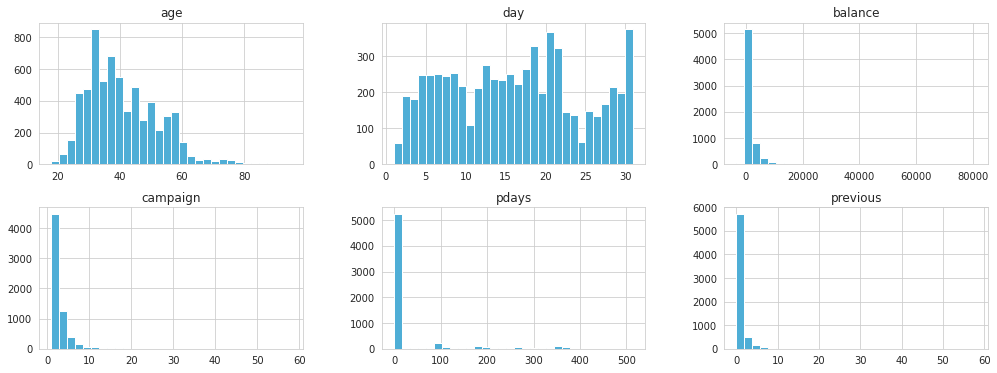

In [ ]:
sns.set_style('whitegrid')

treino.hist(bins=30, figsize=(17,6), color='#4faed6', layout=(2, 3), column=['age', 'day', 'balance', 'campaign', 'pdays', 'previous'])
plt.show()



*   A variável ***age*** mostra a distribuição deslocada à esquerda, indicando que a maioria dos clientes têm de 30 a 40 anos. Poucos clientes tem idade acima dos 60 anos;
*   A variável ***day*** possui distribuição uniforme;
*   As variáveis ***balance, campaign, pdays*** e ***previous*** possuem uma distribuição acentuada à esquerda.






In [ ]:
dados = treino.drop(['Unnamed: 0'], axis=1)

Através da plotagem de gráficos de dispersão correlacionado em pares, é possível verificar se há relação linear entre as variáveis numéricas.

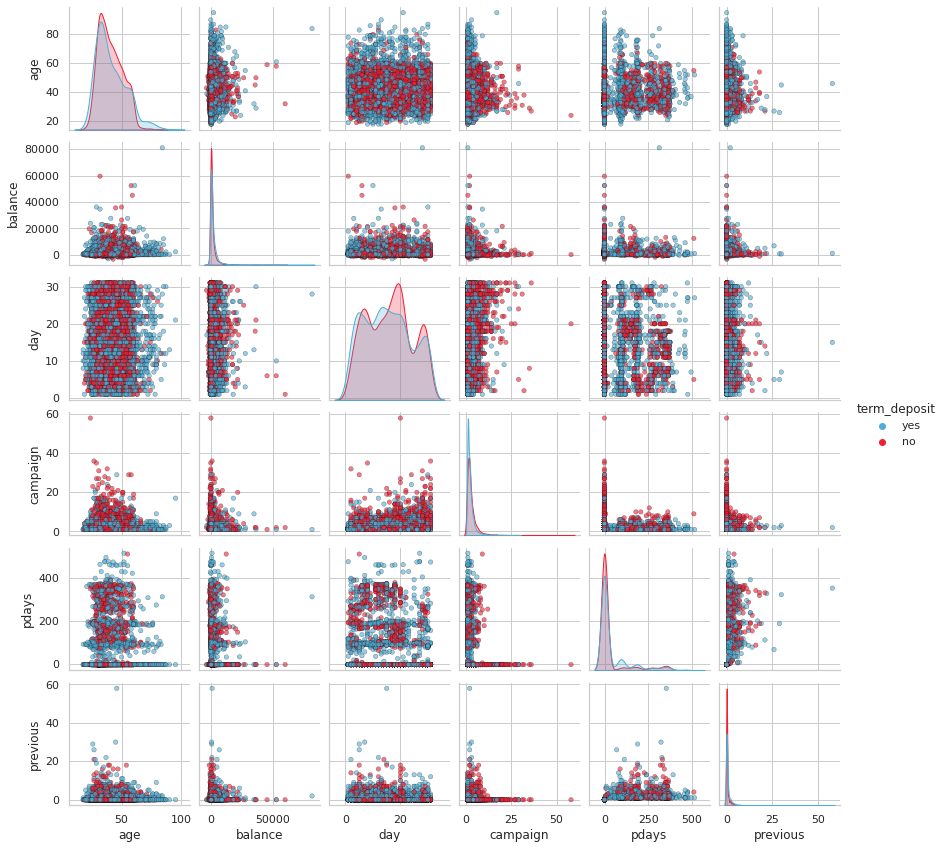

In [ ]:
sns.pairplot(dados, hue='term_deposit', palette=cores, plot_kws = {'alpha': 0.6, 's': 20, 'edgecolor': 'k'},
             height = 2);

Dos gráficos analizados, apenas a relação *campaign* x *day* apresenta uma relação linear.

**Variáveis numéricas x variável resposta**

Agora, analizaremos as variáveis numéricas em relação à variável resposta.

**Age**

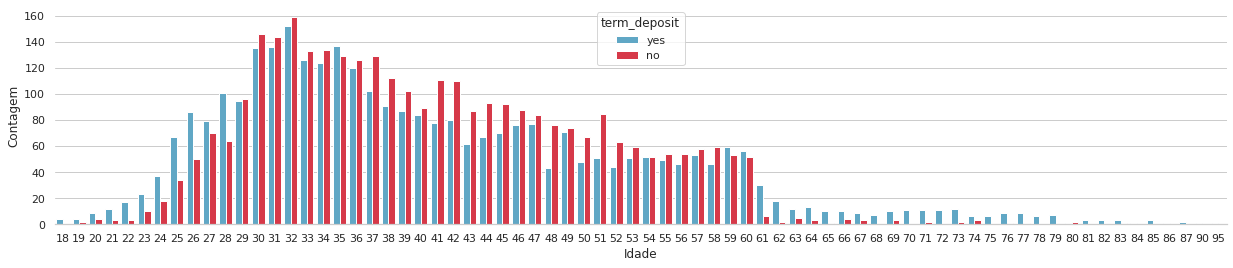

In [ ]:
plt.figure(figsize=(21, 4))
sns.countplot(x='age', hue='term_deposit', palette=cores, data=treino)
sns.set(style='whitegrid')
plt.xlabel('Idade')
plt.ylabel('Contagem')
sns.despine(left=True);

In [ ]:
treino['idade'] = pd.cut(treino['age'], bins=[0, 29, 39, 49, 59, 100], labels=['> 18-29', '30-39', '40-49', '50-59', '> 59'])

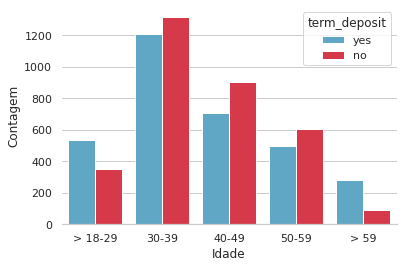

In [ ]:
sns.countplot(x='idade', hue='term_deposit', palette=cores, data=treino)
sns.set(style='whitegrid')
plt.xlabel('Idade')
plt.ylabel('Contagem')
sns.despine(left=True);

**Day**

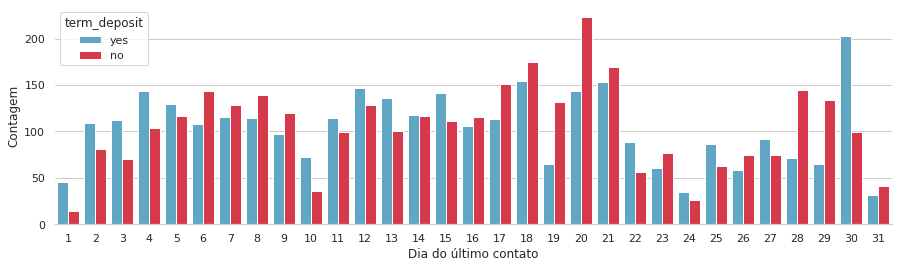

In [ ]:
plt.figure(figsize=(15, 4))
sns.countplot(x='day', hue='term_deposit', palette=cores, data=treino)
sns.set(style='whitegrid')
plt.xlabel('Dia do último contato')
plt.ylabel('Contagem')
sns.despine(left=True);

**Balance**

In [ ]:
treino['saldo'] = pd.cut(treino['balance'], bins=[-10000, 2000, 15000, 100000], labels=['>= 2k', '< 2k a 15k', '< 15k'])

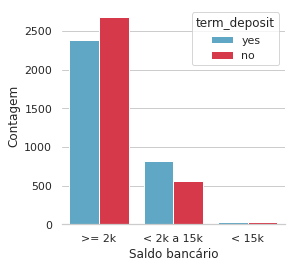

In [ ]:
plt.figure(figsize=(4, 4))
sns.countplot(x='saldo', hue='term_deposit', palette=cores, data=treino)
sns.set(style='whitegrid')
plt.xlabel('Saldo bancário')
plt.ylabel('Contagem')
sns.despine(left=True);

**Campaign**

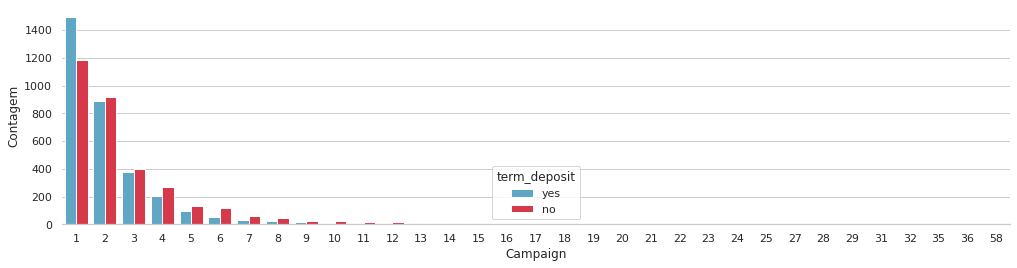

In [ ]:
plt.figure(figsize=(17, 4))
sns.countplot(x='campaign', hue='term_deposit', palette=cores, data=treino)
sns.set(style='whitegrid')
plt.xlabel('Campaign')
plt.ylabel('Contagem')
sns.despine(left=True);

Analizando as variáveis *age*, *day* e *balance*, podemos inferir que:


*   Taxa de abertura do *term deposit* é maior entre os mais jovens e mais velhos;
*   Saldo bancário maior aumenta a taxa de adesão;
*   Quando o contato é realizado na primeira quinzena do mês, a propensão de adesão é maior;
*   Mais campanhas ao mesmo cliente não significam maior taxa de sucesso.

### **Analizando as variáveis categóricas**

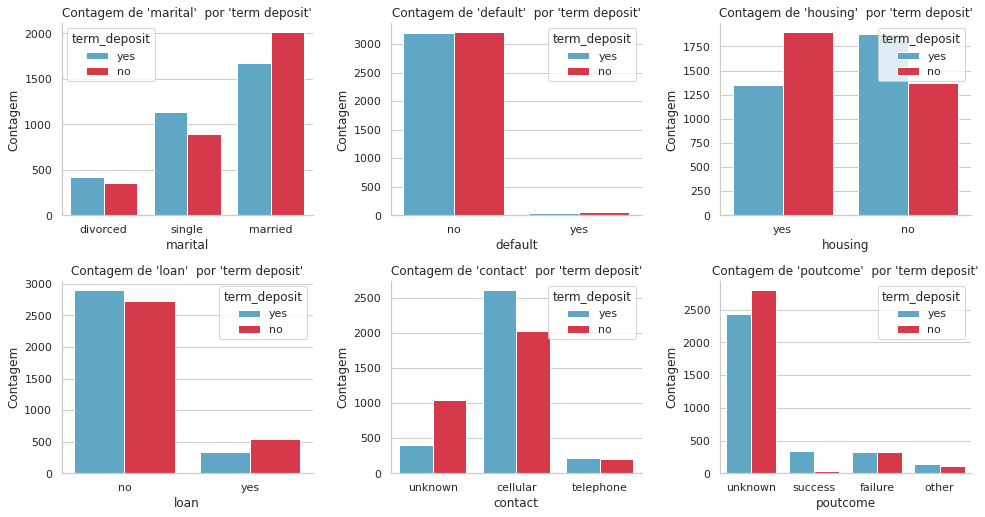

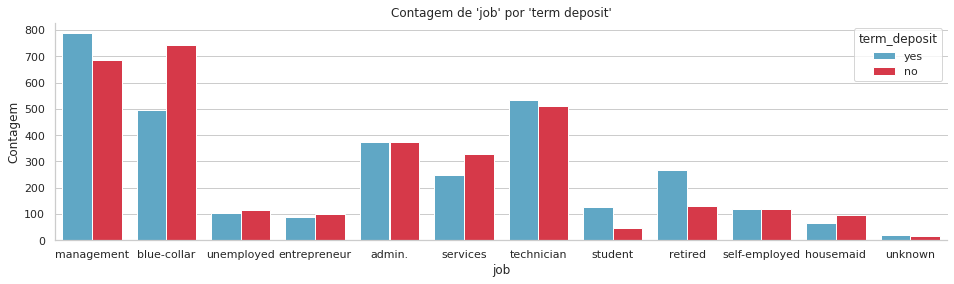

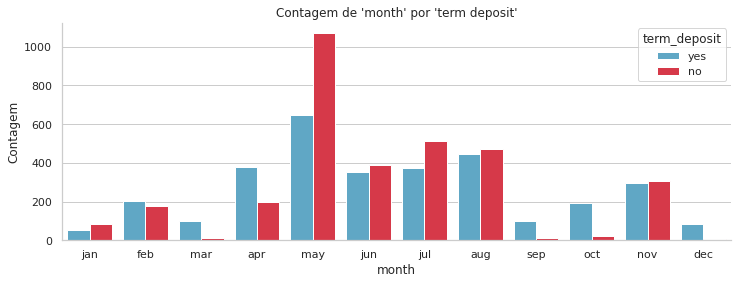

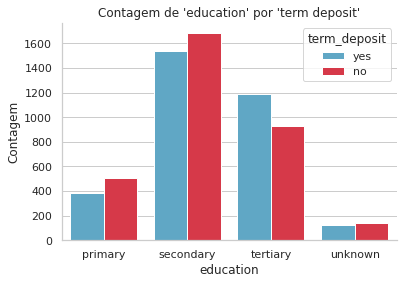

In [ ]:
plt.figure(figsize=[14,14])

features = treino.drop(['Unnamed: 0', 'age', 'balance', 'day', 'campaign', 'pdays', 'previous', 'term_deposit', 'job', 'idade', 'saldo', 'month', 'education'], axis=1)
n=1
for f in features:
    plt.subplot(4, 3, n)
    sns.countplot(x=f, hue='term_deposit', palette=cores, data=treino)
    sns.despine()
    plt.ylabel('Contagem')
    plt.title("Contagem de '{}'  por 'term deposit'".format(f))
    n=n+1
plt.tight_layout()
plt.show()

plt.figure(figsize=[16,4])
sns.countplot(x='job', hue='term_deposit', palette=cores, data=treino)
plt.ylabel('Contagem')
sns.despine()
plt.title("Contagem de 'job' por 'term deposit'")
plt.show()

plt.figure(figsize=[12,4])
sns.countplot(x='month', hue='term_deposit', palette=cores, data=treino, order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
plt.ylabel('Contagem')
sns.despine()
plt.title("Contagem de 'month' por 'term deposit'")
plt.show()

plt.figure(figsize=[6,4])
sns.countplot(x='education', hue='term_deposit', palette=cores, data=treino, order=['primary', 'secondary', 'tertiary', 'unknown'])
plt.ylabel('Contagem')
sns.despine()
plt.title("Contagem de 'education' por 'term deposit'")
plt.show()

Podemos inferir que:
*   Os grupos com menor propensão de abertura de um *term deposit* são:
  *   casados;
  *   com nível de escolaridade mais baixo;
  *   trabalhadores de nível médio (ex. *blue-collar, services*);
  *   que não possuem empréstimo.
*   Contato realizado por celular tem retorno positivo maior;
*   O segundo quadrimestre do ano (*may, jun, jul, aug*) é o que apresenta resultados menos satisfatórios;
*   O sucesso de uma campanha anterior é bastante relevante para o sucesso da campanha atual, embora a porcentagem seja pequena, em comparação com o total de clientes.

## **Conclusão - visualização de dados**

Analizando o conjunto de dados, pudemos concluir que o perfil de clientes com maior propensão à abertura de um *term deposit* são os clientes mais jovens e idosos, com maior saldo bancário, que não são casados e cujos empregos não se enquadram no nível médio.

Também verificamos que as épocas do ano mais favoráveis para se realizar uma campanha de marketing são o início e fim do ano, e na primeira quinzena do mês.

Na próxima etapa do projeto, desenvolveremos um modelo de machine learning que preveja se o cliente irá ou não abrir um *term deposit*.